In [1]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('..')

In [3]:
from utils import ExperimentManager
import matplotlib.pyplot as plt

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

In [33]:
gcn_exp = dict(
    label = "GCN",
    collection = "l_sbm_cert_gcn",
    start_id = 1,
    end_id = 735,
    n_seeds = 5,
)
appnp_exp = dict(
    label = "APPNP",
    collection = "l_sbm_cert_appnp",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
appnp_alpha1_exp = dict(
    label = "APPNP_alpha1",
    collection = "l_sbm_cert_appnp",
    start_id = 1471,
    end_id = 1715,
    n_seeds = 5,
)
sgc_exp = dict(
    label = "SGC",
    collection = "m_sbm_cert_sgc",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
gcn_skippc_linear_exp = dict(
    label = "GCN_skippc_linear",
    collection = "m_sbm_cert_gcn_skippc",
    start_id = [246, 736],
    end_id = [490, 980],
    n_seeds = 5,
)
gcn_skippc_relu_exp = dict(
    label = "GCN_skippc_relu",
    collection = "m_sbm_cert_gcn_skippc",
    start_id = [1, 491],
    end_id = [245, 735],
    n_seeds = 5,
)
gcn_skipalpha_linear_alpha01_exp = dict(
    label = "GCN_skipalpha_linear_alpha0.1",
    collection = "m_sbm_cert_gcn_skipalpha",
    start_id = [491, 1471],
    end_id = [735, 1715],
    n_seeds = 5,
)
gcn_skipalpha_linear_alpha02_exp = dict(
    label = "GCN_skipalpha_linear_alpha0.2",
    collection = "m_sbm_cert_gcn_skipalpha",
    start_id = [736, 1716],
    end_id = [980, 1960],
    n_seeds = 5,
)
gcn_skipalpha_relu_alpha01_exp = dict(
    label = "GCN_skipalpha_relu_alpha0.1",
    collection = "m_sbm_cert_gcn_skipalpha",
    start_id = [1, 981],
    end_id = [245, 1225],
    n_seeds = 5,
)
gcn_skipalpha_relu_alpha02_exp = dict(
    label = "GCN_skipalpha_relu_alpha0.2",
    collection = "m_sbm_cert_gcn_skipalpha",
    start_id = [246, 1226],
    end_id = [490, 1470],
    n_seeds = 5,
)
sgc_depth2_exp = dict(
    label = "SGC_depth2",
    collection = "m_sbm_cert_sgc_depth2",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
sgc_depth4_exp = dict(
    label = "SGC_depth4",
    collection = "m_sbm_cert_sgc_depth4",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
K = 1.5
attack_nodes = "test"
delta_l = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
n_adv_l = [1, 2, 6, 12, 24, 60, 120]

## Certification works for GNNS

In [47]:
experiments = [gcn_exp, appnp_exp, sgc_exp, appnp_alpha1_exp,
               gcn_skippc_linear_exp, gcn_skippc_relu_exp, 
               gcn_skipalpha_linear_alpha01_exp, gcn_skipalpha_linear_alpha02_exp,
               gcn_skipalpha_relu_alpha01_exp, gcn_skipalpha_relu_alpha02_exp]
experiment_manager = ExperimentManager(experiments)

GCN No. of experiments 147
APPNP No. of experiments 98
SGC No. of experiments 98
APPNP_alpha1 No. of experiments 49
GCN_skippc_linear No. of experiments 49
GCN_skippc_linear No. of experiments 49
GCN_skippc_relu No. of experiments 49
GCN_skippc_relu No. of experiments 49
GCN_skipalpha_linear_alpha0.1 No. of experiments 49
GCN_skipalpha_linear_alpha0.1 No. of experiments 49
GCN_skipalpha_linear_alpha0.2 No. of experiments 49
GCN_skipalpha_linear_alpha0.2 No. of experiments 49
GCN_skipalpha_relu_alpha0.1 No. of experiments 49
GCN_skipalpha_relu_alpha0.1 No. of experiments 49
GCN_skipalpha_relu_alpha0.2 No. of experiments 49
GCN_skipalpha_relu_alpha0.2 No. of experiments 49


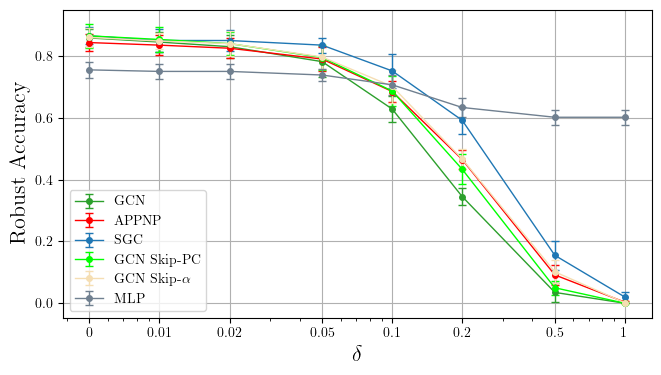

In [58]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "APPNP_alpha1"]
legend_labels = ["GCN","APPNP", "SGC", 
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$", "MLP"]
n_adv_plot = 24
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=True, savefig=savefig)

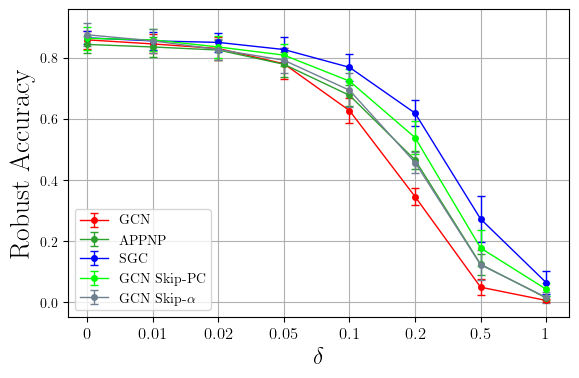

In [15]:
C_l = [0.001]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2"]
legend_labels = ["GCN","APPNP", "SGC", 
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$"]
n_adv_plot = 24
savefig = f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

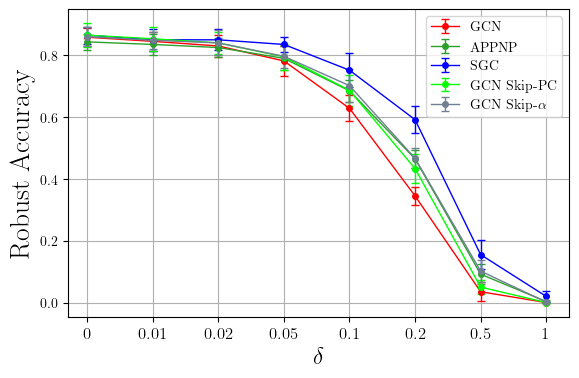

In [16]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2"]
legend_labels = ["GCN","APPNP", "SGC", 
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$"]
n_adv_plot = 24
savefig = f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

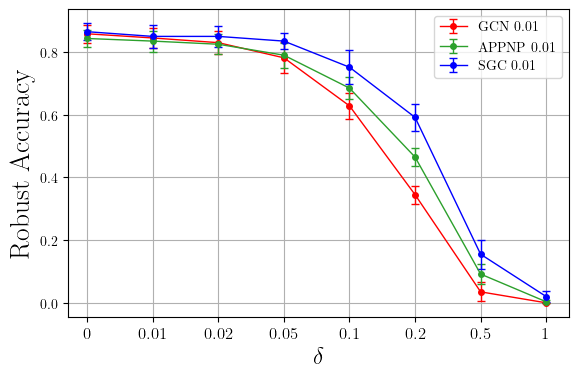

In [32]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

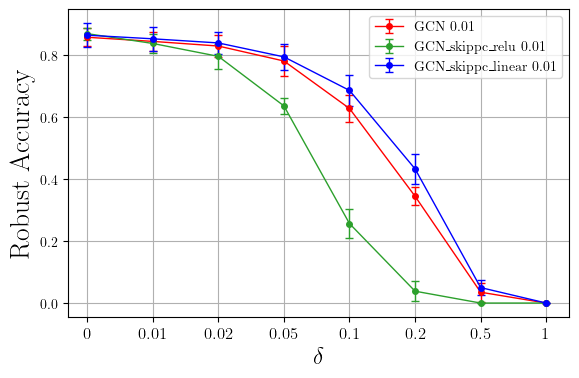

In [33]:
C_l = [0.01]
models = ["GCN", "GCN_skippc_relu", "GCN_skippc_linear"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

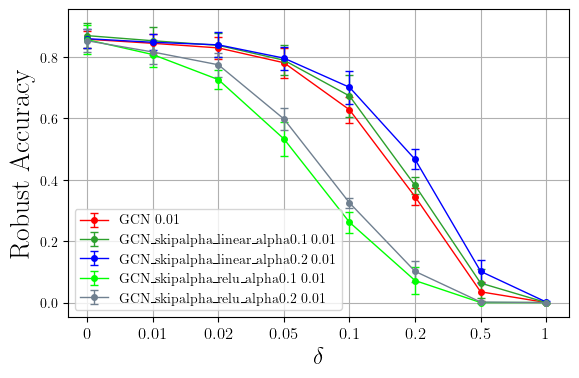

In [34]:
C_l = [0.01]
models = ["GCN", "GCN_skipalpha_linear_alpha0.1", "GCN_skipalpha_linear_alpha0.2",
          "GCN_skipalpha_relu_alpha0.1", "GCN_skipalpha_relu_alpha0.2"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

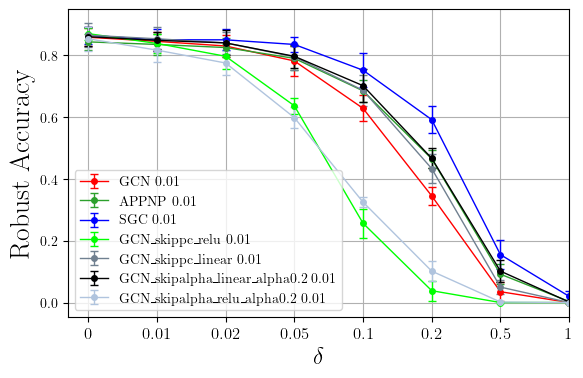

In [63]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
          "GCN_skippc_relu", "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "GCN_skipalpha_relu_alpha0.2",]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l, xlogscale=False)

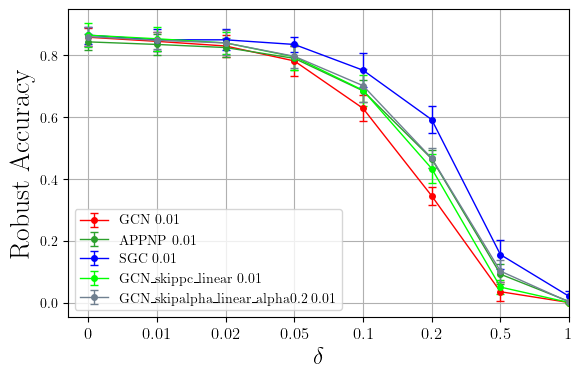

In [65]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l, xlogscale=False)

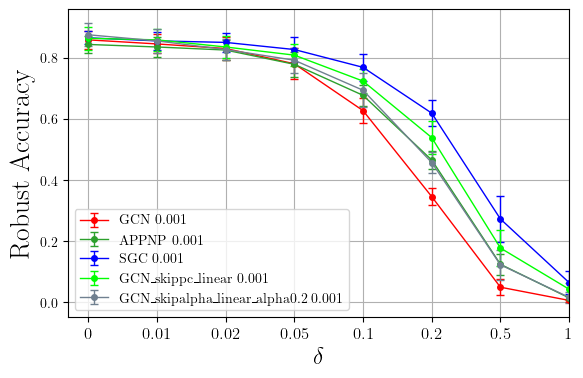

In [66]:
C_l = [0.001]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l, xlogscale=False)

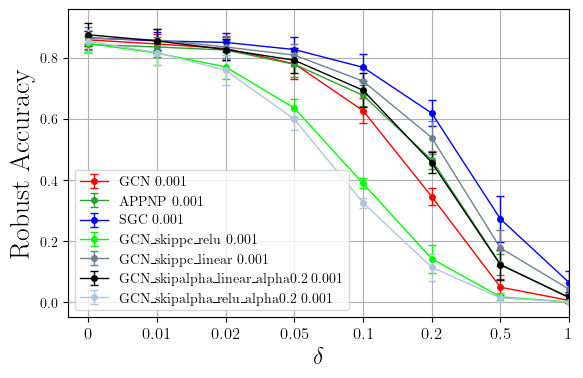

In [64]:
C_l = [0.001]
models = ["GCN","APPNP", "SGC", 
          "GCN_skippc_relu", "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "GCN_skipalpha_relu_alpha0.2",]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l, xlogscale=False)

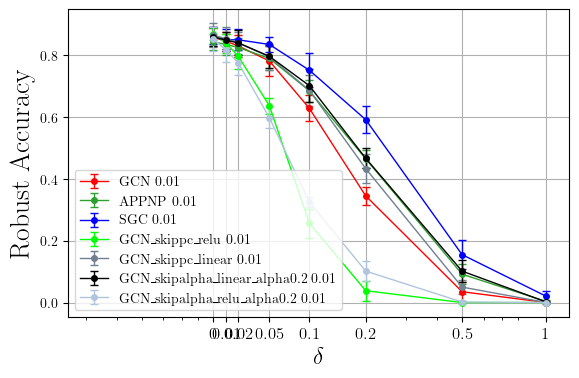

In [60]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
          "GCN_skippc_relu", "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "GCN_skipalpha_relu_alpha0.2",]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l, xlogscale=True)

## Graph structure improves robustness

In [6]:
appnp_alpha0_exp = dict(
    label = "APPNP_alpha0",
    collection = "l_sbm_cert_appnp",
    start_id = 736,
    end_id = 980,
    n_seeds = 5,
)
appnp_alpha01_exp = dict(
    label = "APPNP_alpha0.1",
    collection = "l_sbm_cert_appnp",
    start_id = 491,
    end_id = 735,
    n_seeds = 5,
)
appnp_alpha03_exp = dict(
    label = "APPNP_alpha0.3",
    collection = "l_sbm_cert_appnp",
    start_id = 981,
    end_id = 1225,
    n_seeds = 5,
)
appnp_alpha05_exp = dict(
    label = "APPNP_alpha0.5",
    collection = "l_sbm_cert_appnp",
    start_id = 1226,
    end_id = 1470,
    n_seeds = 5,
)
appnp_alpha1_exp = dict(
    label = "APPNP_alpha1",
    collection = "l_sbm_cert_appnp",
    start_id = 1471,
    end_id = 1715,
    n_seeds = 5,
)

In [7]:
experiments = [gcn_exp, appnp_exp, sgc_exp, 
               gcn_skippc_linear_exp, gcn_skipalpha_linear_alpha02_exp,
               appnp_alpha0_exp, appnp_alpha01_exp, appnp_alpha03_exp, 
               appnp_alpha05_exp, appnp_alpha1_exp
               ]
experiment_manager = ExperimentManager(experiments)

GCN No. of experiments 147
APPNP No. of experiments 98
SGC No. of experiments 98
GCN_skippc_linear No. of experiments 49
GCN_skippc_linear No. of experiments 49
GCN_skipalpha_linear_alpha0.2 No. of experiments 49
GCN_skipalpha_linear_alpha0.2 No. of experiments 49
APPNP_alpha0 No. of experiments 49
APPNP_alpha0.1 No. of experiments 49
APPNP_alpha0.3 No. of experiments 49
APPNP_alpha0.5 No. of experiments 49
APPNP_alpha1 No. of experiments 49


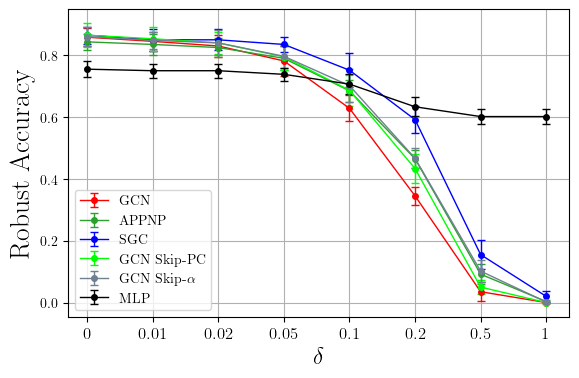

In [17]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "APPNP_alpha1"]
legend_labels = ["GCN","APPNP", "SGC", 
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$", "MLP"]
n_adv_plot = 24
savefig = f'gnn_graph_information_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, 
                                         legend_labels=legend_labels, xlogscale=False, 
                                         savefig=savefig)

KeyError: 0.001

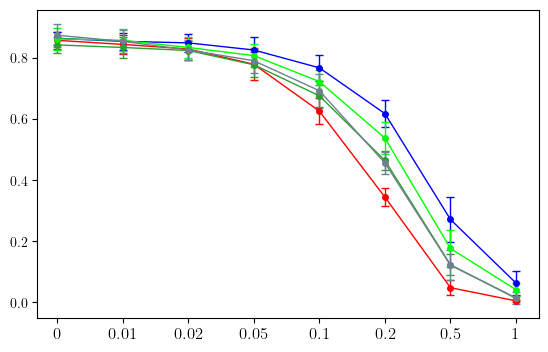

In [18]:
C_l = [0.001]
models = ["GCN","APPNP", "SGC", 
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "APPNP_alpha1"]
legend_labels = ["GCN","APPNP", "SGC", 
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$", "MLP"]
n_adv_plot = 24
savefig = f'gnn_graph_information_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, 
                                         legend_labels=legend_labels, xlogscale=False, 
                                         savefig=savefig)

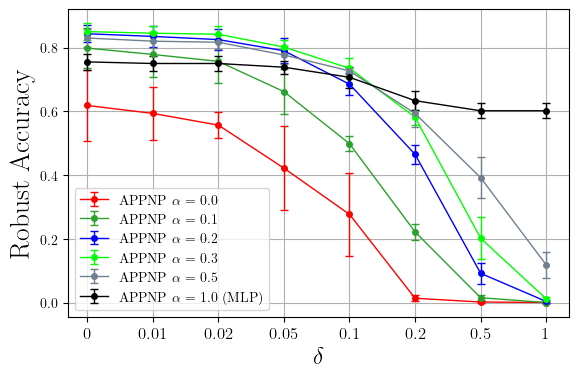

In [8]:
C_l = [0.01]
models = [ "APPNP_alpha0", "APPNP_alpha0.1", "APPNP", "APPNP_alpha0.3", "APPNP_alpha0.5", "APPNP_alpha1"]
legend_labels = [ "APPNP $\\alpha=0.0$", "APPNP $\\alpha=0.1$", "APPNP $\\alpha=0.2$", 
                 "APPNP $\\alpha=0.3$", "APPNP $\\alpha=0.5$", "APPNP $\\alpha=1.0$ (MLP)"]
n_adv_plot = 24
savefig = f'APPNP_graph_information_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, 
                                         legend_labels=legend_labels, xlogscale=False, 
                                         savefig=savefig)

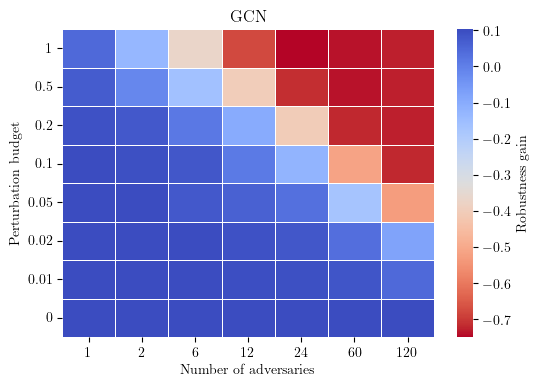

In [17]:
C = 0.01
model = "GCN"
mlp = "APPNP_alpha1"
n_adv_plot = 24
savefig = f'{model}_graph_info_robust_gain_C{C}_linf.png'
experiment_manager.plot_nadv_delta_robust_gain_wrt_mlp_heatmap(K, [model], C, 
                              attack_nodes, n_adv_l, delta_l[::-1], mlp=mlp,
                              width=1, ratio=1.5, savefig=savefig)

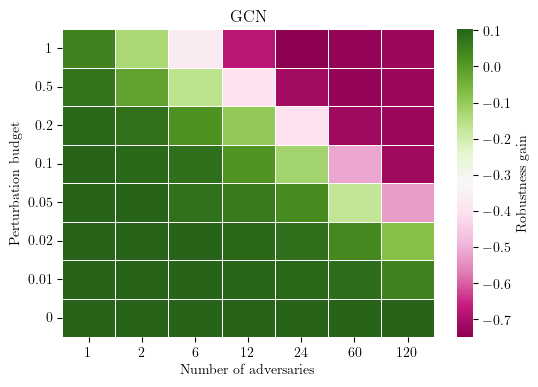

In [16]:
C = 0.01
model = "GCN"
mlp = "APPNP_alpha1"
n_adv_plot = 24
savefig = f'{model}_graph_info_robust_gain_C{C}_linf.png'
experiment_manager.plot_nadv_delta_robust_gain_wrt_mlp_heatmap(K, [model], C, 
                              attack_nodes, n_adv_l, delta_l[::-1], mlp=mlp,
                              width=1, ratio=1.5, cbar_normalized=False)

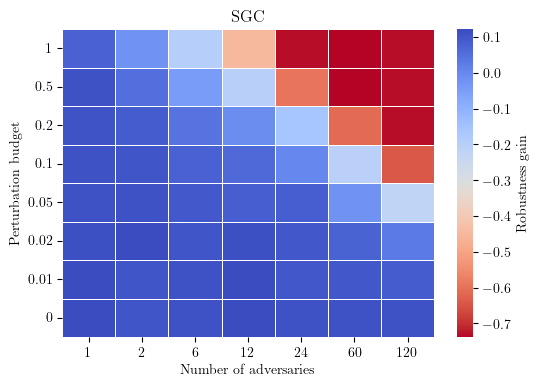

In [18]:
C = 0.01
model = "SGC"
mlp = "APPNP_alpha1"
n_adv_plot = 24
savefig = f'{model}_graph_info_robust_gain_C{C}_linf.png'
experiment_manager.plot_nadv_delta_robust_gain_wrt_mlp_heatmap(K, [model], C, 
                              attack_nodes, n_adv_l, delta_l[::-1], mlp=mlp,
                              width=1, ratio=1.5, savefig=savefig)

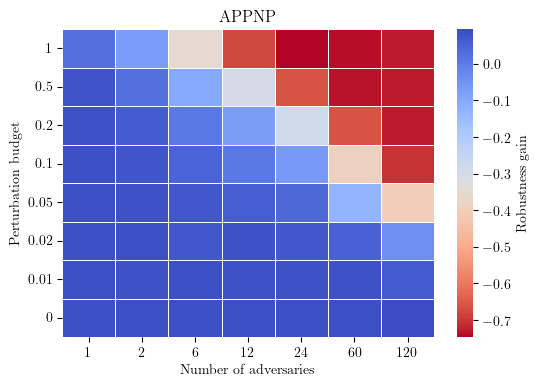

In [19]:
C = 0.01
model = "APPNP"
mlp = "APPNP_alpha1"
n_adv_plot = 24
savefig = f'{model}_graph_info_robust_gain_C{C}_linf.png'
experiment_manager.plot_nadv_delta_robust_gain_wrt_mlp_heatmap(K, [model], C, 
                              attack_nodes, n_adv_l, delta_l[::-1], mlp=mlp,
                              width=1, ratio=1.5, savefig=savefig)

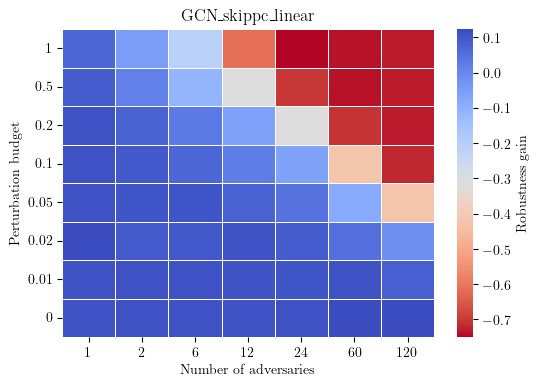

In [20]:
C = 0.01
model = "GCN_skippc_linear"
mlp = "APPNP_alpha1"
n_adv_plot = 24
savefig = f'{model}_graph_info_robust_gain_C{C}_linf.png'
experiment_manager.plot_nadv_delta_robust_gain_wrt_mlp_heatmap(K, [model], C, 
                              attack_nodes, n_adv_l, delta_l[::-1], mlp=mlp,
                              width=1, ratio=1.5, savefig=savefig)

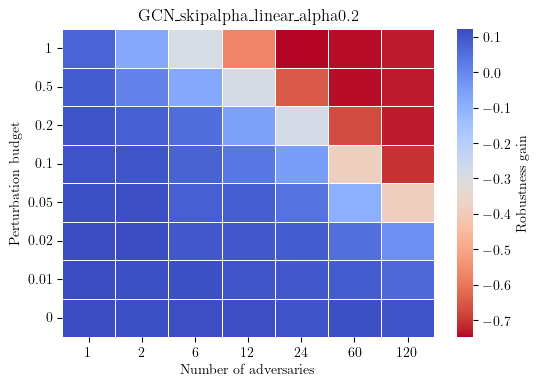

In [22]:
C = 0.01
model = "GCN_skipalpha_linear_alpha0.2"
mlp = "APPNP_alpha1"
n_adv_plot = 24
savefig = f'{model}_graph_info_robust_gain_C{C}_linf.png'
experiment_manager.plot_nadv_delta_robust_gain_wrt_mlp_heatmap(K, [model], C, 
                              attack_nodes, n_adv_l, delta_l[::-1], mlp=mlp,
                              width=1, ratio=1.5, savefig=savefig)

## Sparsity vs robustness
labels with sparsity_1 : within_deg = 2x, between_deg = 2x 

labels with sparsity_2 : within_deg = x/2, between_deg = x/2 

labels with sparsity_3 : within_deg = x/4, between_deg = x/4

In [5]:
gcn_sparsity_1_exp = dict(
    label = "GCN_sparsity_1",
    collection = "m_sbm_cert_gcn",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
gcn_sparsity_2_exp = dict(
    label = "GCN_sparsity_2",
    collection = "m_sbm_cert_gcn",
    start_id = 491,
    end_id = 980,
    n_seeds = 5,
)
gcn_sparsity_3_exp = dict(
    label = "GCN_sparsity_3",
    collection = "m_sbm_cert_gcn",
    start_id = 981,
    end_id = 1470,
    n_seeds = 5,
)
sgc_sparsity_1_exp = dict(
    label = "SGC_sparsity_1",
    collection = "m_sbm_cert_sgc",
    start_id = 491,
    end_id = 980,
    n_seeds = 5,
)
sgc_sparsity_2_exp = dict(
    label = "SGC_sparsity_2",
    collection = "m_sbm_cert_sgc",
    start_id = 981,
    end_id = 1470,
    n_seeds = 5,
)
sgc_sparsity_3_exp = dict(
    label = "SGC_sparsity_3",
    collection = "m_sbm_cert_sgc",
    start_id = 1471,
    end_id = 1960,
    n_seeds = 5,
)
appnp_sparsity_1_exp = dict(
    label = "APPNP_sparsity_1",
    collection = "m_sbm_cert_appnp",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
appnp_sparsity_2_exp = dict(
    label = "APPNP_sparsity_2",
    collection = "m_sbm_cert_appnp",
    start_id = 491,
    end_id = 980,
    n_seeds = 5,
)
appnp_sparsity_3_exp = dict(
    label = "APPNP_sparsity_3",
    collection = "m_sbm_cert_appnp",
    start_id = 981,
    end_id = 1470,
    n_seeds = 5,
)

In [7]:
experiments = [gcn_exp, sgc_exp, 
               gcn_sparsity_1_exp, gcn_sparsity_2_exp, gcn_sparsity_3_exp,
               sgc_sparsity_1_exp, sgc_sparsity_2_exp, sgc_sparsity_3_exp
               ]
experiment_manager = ExperimentManager(experiments)

GCN No. of experiments 147
SGC No. of experiments 98
GCN_sparsity_1 No. of experiments 98
GCN_sparsity_2 No. of experiments 98
GCN_sparsity_3 No. of experiments 98
SGC_sparsity_1 No. of experiments 98
SGC_sparsity_2 No. of experiments 98
SGC_sparsity_3 No. of experiments 98


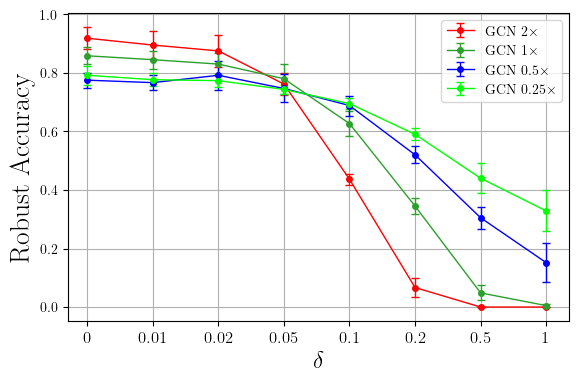

In [12]:
C_l = [0.001]
models = ["GCN_sparsity_1", "GCN",  "GCN_sparsity_2", "GCN_sparsity_3"]
legend_labels = ["GCN $2\\times$", "GCN $1\\times$", "GCN $0.5\\times$", "GCN $0.25\\times$"]
n_adv_plot = 24
savefig = f'GCN_sparsity_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

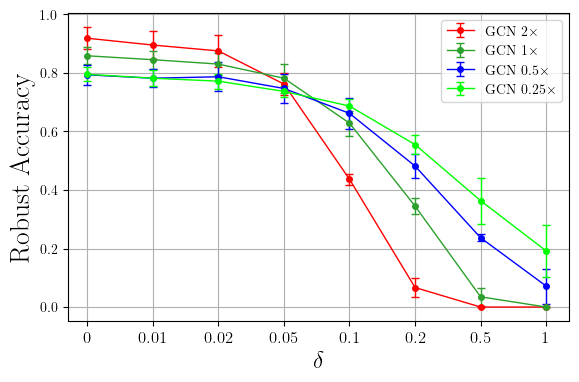

In [14]:
C_l = [0.01]
models = ["GCN_sparsity_1", "GCN",  "GCN_sparsity_2", "GCN_sparsity_3"]
legend_labels = ["GCN $2\\times$", "GCN $1\\times$", "GCN $0.5\\times$", "GCN $0.25\\times$"]
n_adv_plot = 24
savefig = f'GCN_sparsity_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

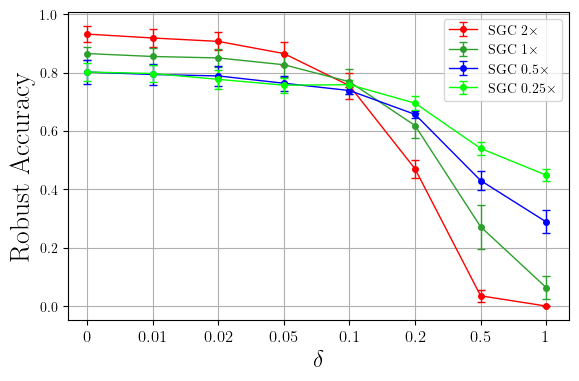

In [13]:
C_l = [0.001]
models = ["SGC_sparsity_1","SGC",  "SGC_sparsity_2", "SGC_sparsity_3"]
legend_labels = ["SGC $2\\times$", "SGC $1\\times$", "SGC $0.5\\times$", "SGC $0.25\\times$"]

n_adv_plot = 24
savefig = f'SGC_sparsity_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

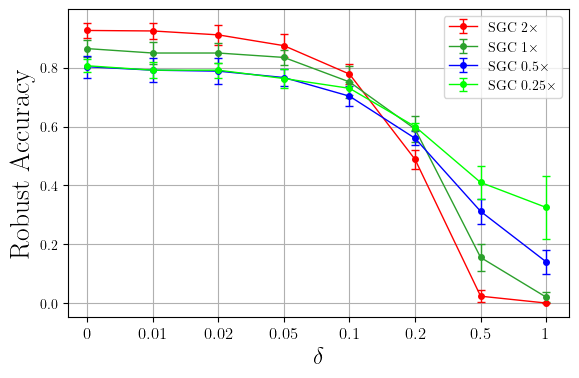

In [15]:
C_l = [0.01]
models = ["SGC_sparsity_1","SGC",  "SGC_sparsity_2", "SGC_sparsity_3"]
legend_labels = ["SGC $2\\times$", "SGC $1\\times$", "SGC $0.5\\times$", "SGC $0.25\\times$"]

n_adv_plot = 24
savefig = f'SGC_sparsity_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

In [6]:
experiments = [appnp_exp, 
               appnp_sparsity_1_exp, appnp_sparsity_2_exp, appnp_sparsity_3_exp
               ]
experiment_manager = ExperimentManager(experiments)

APPNP No. of experiments 98
APPNP_sparsity_1 No. of experiments 98
APPNP_sparsity_2 No. of experiments 98
APPNP_sparsity_3 No. of experiments 98


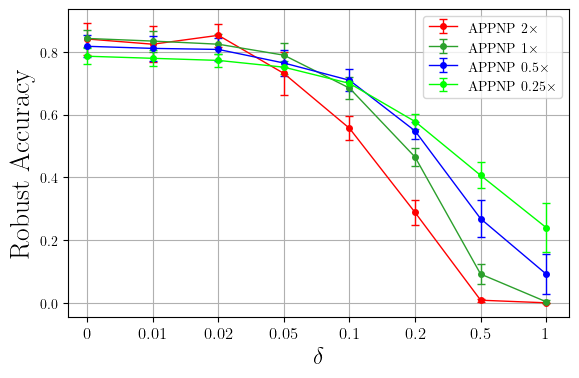

In [11]:
C_l = [0.01]
models = ["APPNP_sparsity_1","APPNP",  "APPNP_sparsity_2", "APPNP_sparsity_3"]
legend_labels = ["APPNP $2\\times$", "APPNP $1\\times$", "APPNP $0.5\\times$", "APPNP $0.25\\times$"]

n_adv_plot = 24
savefig = f'APPNP_sparsity_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

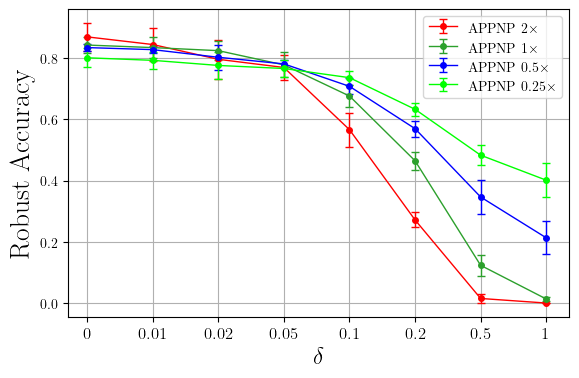

In [10]:
C_l = [0.001]
models = ["APPNP_sparsity_1","APPNP",  "APPNP_sparsity_2", "APPNP_sparsity_3"]
legend_labels = ["APPNP $2\\times$", "APPNP $1\\times$", "APPNP $0.5\\times$", "APPNP $0.25\\times$"]

n_adv_plot = 24
savefig = f'APPNP_sparsity_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

## Collective certificate

In [33]:
sgc_coll_exp = dict(
    label = "SGC",
    collection = "m_sbm_collective_cert_sgc",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
gcn_coll_exp = dict(
    label = "GCN",
    collection = "m_sbm_collective_cert_gcn",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
K = 1.5

In [34]:
experiments = [gcn_coll_exp, sgc_coll_exp]
experiment_manager = ExperimentManager(experiments)

GCN No. of experiments 98
SGC No. of experiments 98


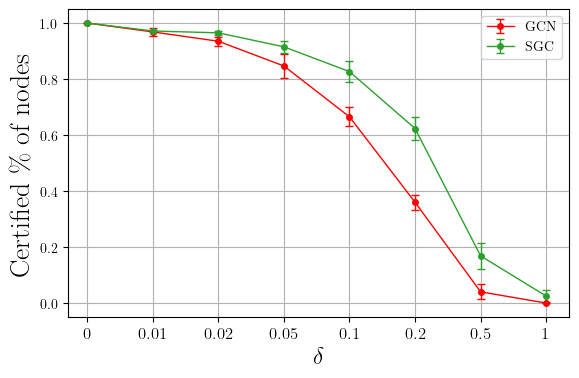

In [33]:
C_l = [0.01]
models = ["GCN", "SGC"]
legend_labels = ["GCN","SGC"]
n_adv_plot = 24
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_collective_cert_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)


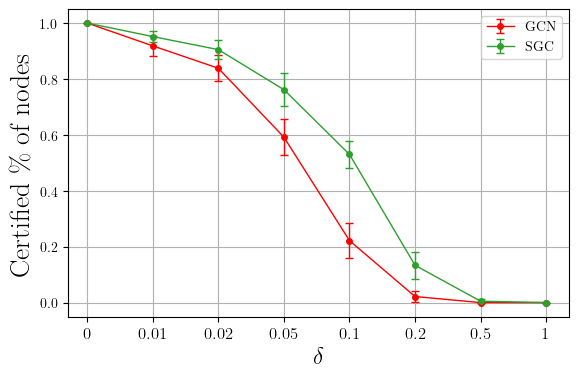

In [35]:
C_l = [0.01]
models = ["GCN", "SGC"]
legend_labels = ["GCN","SGC"]
n_adv_plot = 60
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_collective_cert_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)


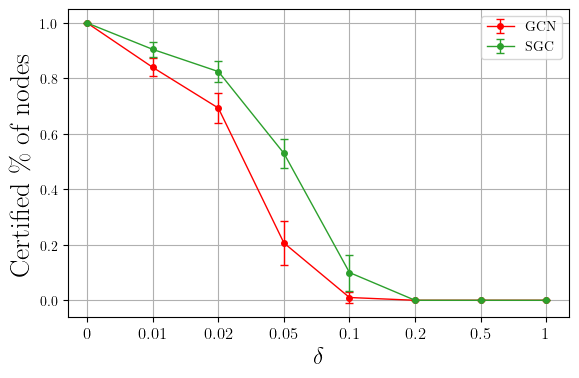

In [36]:
C_l = [0.01]
models = ["GCN", "SGC"]
legend_labels = ["GCN","SGC"]
n_adv_plot = 120
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_collective_cert_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)


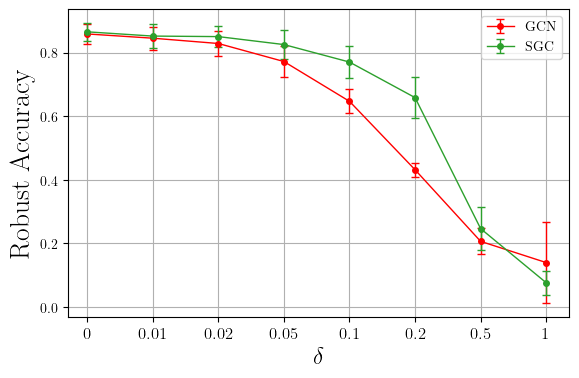

In [34]:
C_l = [0.01]
models = ["GCN","SGC"]
legend_labels = ["GCN", "SGC"]
n_adv_plot = 24
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

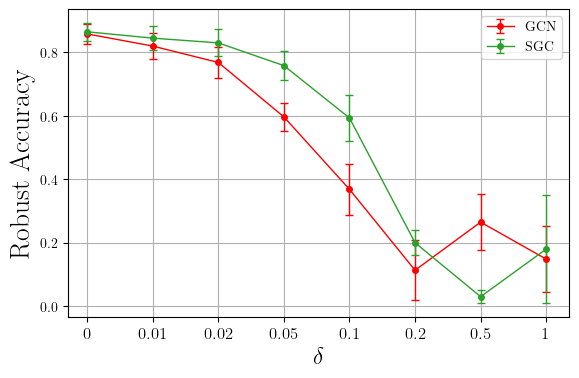

In [37]:
C_l = [0.01]
models = ["GCN","SGC"]
legend_labels = ["GCN", "SGC"]
n_adv_plot = 60
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

## collective vs non collective

In [23]:
sgc_coll_exp = dict(
    label = "SGC",
    relabel = "SGC_coll",
    collection = "m_sbm_collective_cert_sgc",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
gcn_coll_exp = dict(
    label = "GCN",
    relabel = "GCN_coll",
    collection = "m_sbm_collective_cert_gcn",
    start_id = 1,
    end_id = 490,
    n_seeds = 5,
)
K = 1.5

In [24]:
experiments = [gcn_exp, gcn_coll_exp, sgc_exp, sgc_coll_exp]
experiment_manager = ExperimentManager(experiments)

GCN No. of experiments 147
GCN No. of experiments 98
SGC No. of experiments 98
SGC No. of experiments 98


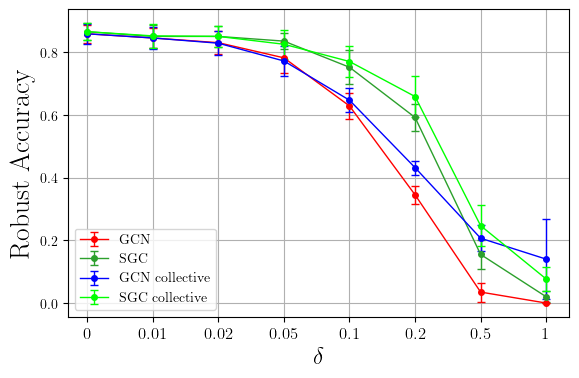

In [25]:
C_l = [0.01]
models = ["GCN","SGC","GCN_coll","SGC_coll" ]
legend_labels = ["GCN", "SGC", "GCN collective", "SGC collective"]
n_adv_plot = 24
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

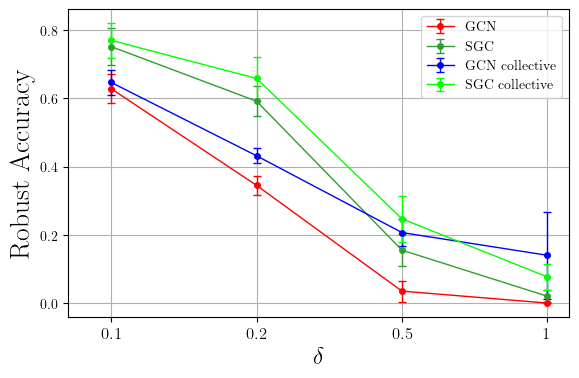

In [16]:
C_l = [0.01]
models = ["GCN","SGC","GCN_coll","SGC_coll" ]
legend_labels = ["GCN", "SGC", "GCN collective", "SGC collective"]
n_adv_plot = 24
delta_ll = [0.1, 0.2, 0.5, 1]
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_ll, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

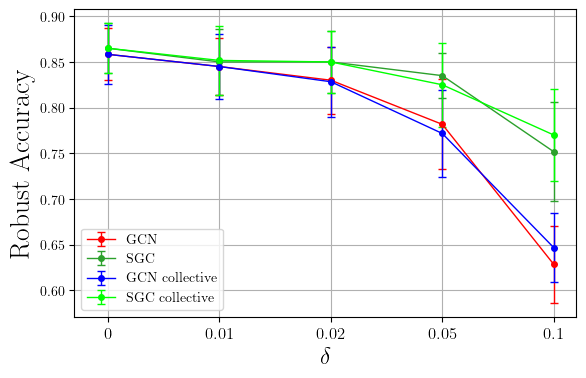

In [24]:
C_l = [0.01]
models = ["GCN","SGC","GCN_coll","SGC_coll" ]
legend_labels = ["GCN", "SGC", "GCN collective", "SGC collective"]
n_adv_plot = 24
delta_ll = [0, 0.01, 0.02, 0.05, 0.1]
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_ll, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

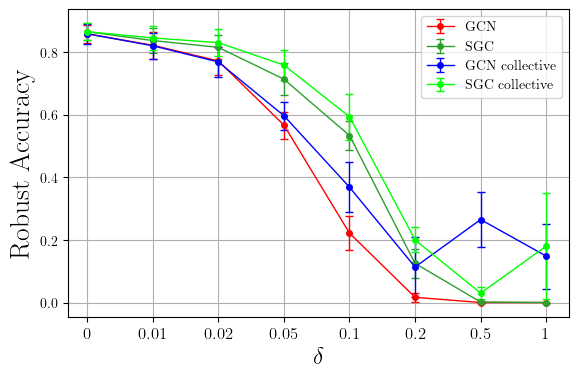

In [31]:
C_l = [0.01]
models = ["GCN","SGC","GCN_coll","SGC_coll" ]
legend_labels = ["GCN", "SGC", "GCN collective", "SGC collective"]
n_adv_plot = 60
# n_adv_l = [1, 2, 6, 12, 24, 60, 120]
delta_ll = [0.1, 0.2, 0.5, 1]
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

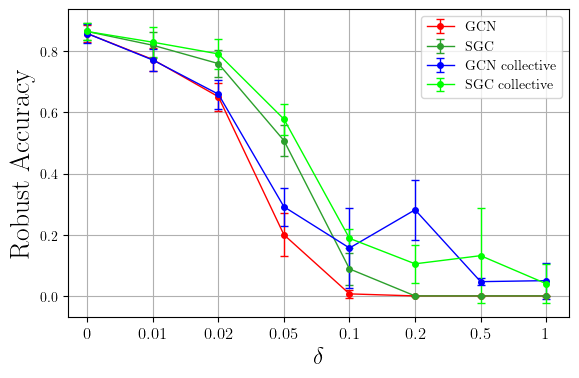

In [32]:
C_l = [0.01]
models = ["GCN","SGC","GCN_coll","SGC_coll" ]
legend_labels = ["GCN", "SGC", "GCN collective", "SGC collective"]
n_adv_plot = 120
# n_adv_l = [1, 2, 6, 12, 24, 60, 120]
delta_ll = [0.1, 0.2, 0.5, 1]
savefig = None #f'gnn_certificate_C{C_l[0]}_adv{n_adv_plot}_linf.png'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, legend_labels=legend_labels, xlogscale=False, savefig=savefig)

## old

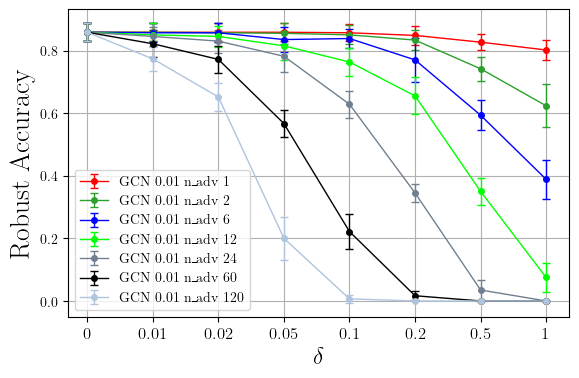

In [ ]:
C_l = [0.01]
experiment_manager.plot_robust_acc_delta_nadv(K, ["GCN"], C_l, attack_nodes, 
                                              n_adv_l=n_adv_l, delta_l=delta_l)

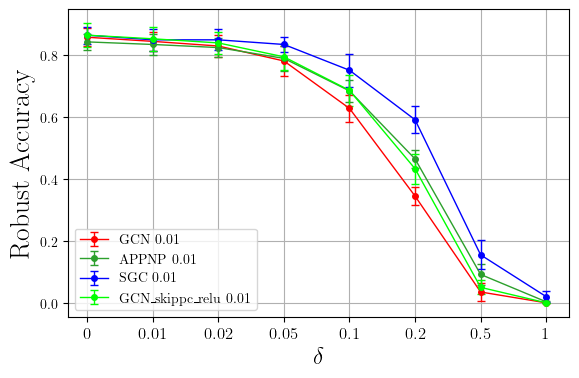

In [ ]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", "GCN_skippc_relu"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

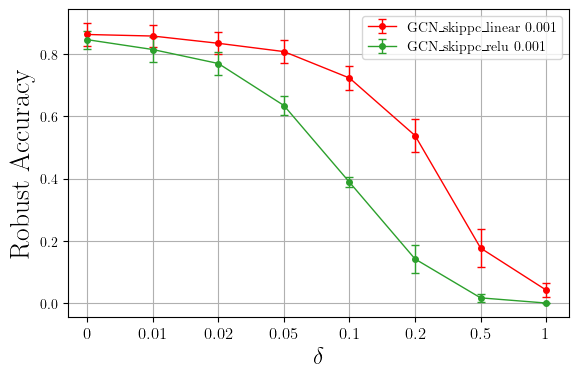

In [ ]:
C_l = [0.001]
models = ["GCN","APPNP", "SGC", "GCN_skippc_linear", "GCN_skippc_relu"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

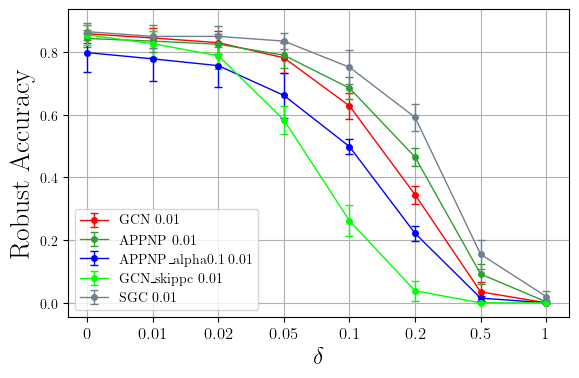

In [ ]:
C_l = [0.01]
models = ["GCN", "APPNP", "APPNP_alpha0.1", "GCN_skippc", "SGC"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

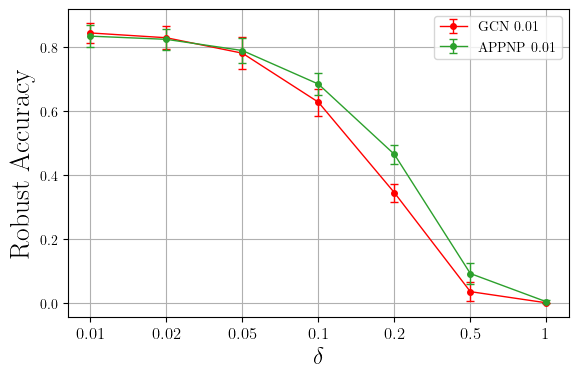

In [ ]:
C_l = [0.01]
experiment_manager.plot_robust_acc_delta(K, ["GCN", "APPNP"], C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

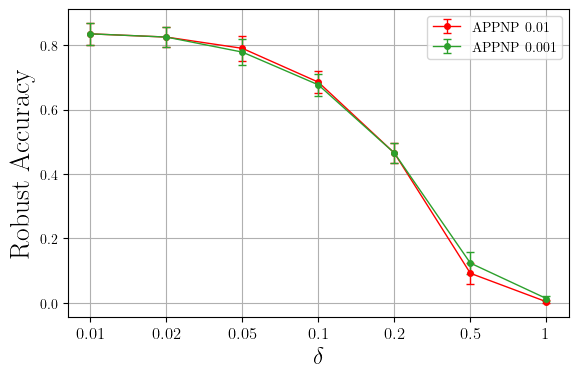

In [ ]:
C_l = [0.01, 0.001]
experiment_manager.plot_robust_acc_delta(K, ["APPNP"], C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

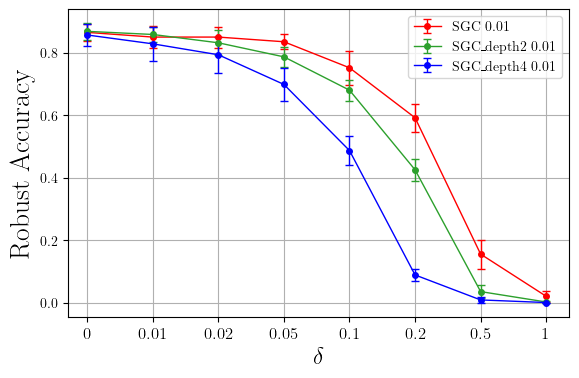

In [ ]:
C_l = [0.01]
models = ["SGC", "SGC_depth2", "SGC_depth4"]
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=24, delta_l=delta_l)

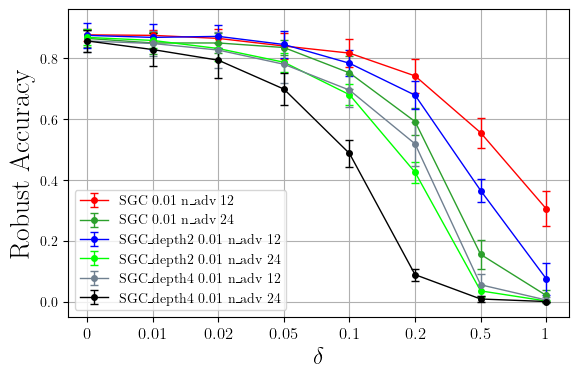

In [ ]:
C_l = [0.01]
models = ["SGC", "SGC_depth2", "SGC_depth4"]
n_adv_list = [12, 24]
experiment_manager.plot_robust_acc_delta_nadv(K, models, C_l, attack_nodes, 
                                              n_adv_l=n_adv_list, delta_l=delta_l)

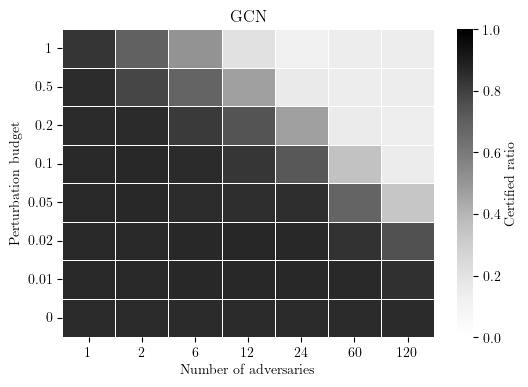

In [ ]:
C = 0.01
experiment_manager.plot_nadv_delta_heatmap(K, ["GCN"], C, 
                              attack_nodes, n_adv_l, delta_l[::-1],
                              width=1, ratio=1.5, cbar_normalized=True)

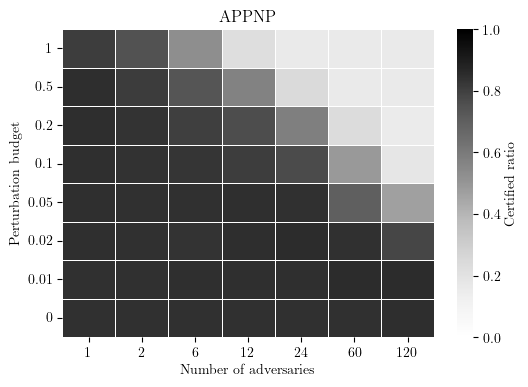

In [ ]:
C = 0.01
experiment_manager.plot_nadv_delta_heatmap(K, ["APPNP"], C, 
                              attack_nodes, n_adv_l, delta_l[::-1],
                              width=1, ratio=1.5, cbar_normalized=True)

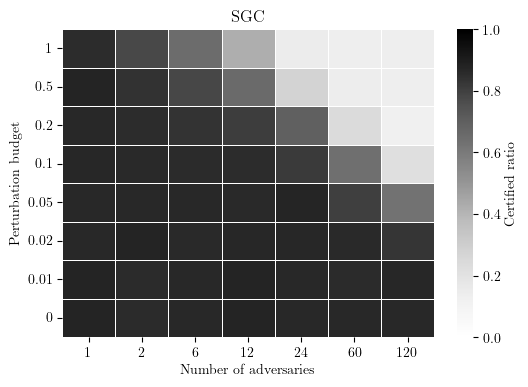

In [ ]:
C = 0.01
experiment_manager.plot_nadv_delta_heatmap(K, ["SGC"], C, 
                              attack_nodes, n_adv_l, delta_l[::-1],
                              width=1, ratio=1.5, cbar_normalized=True)

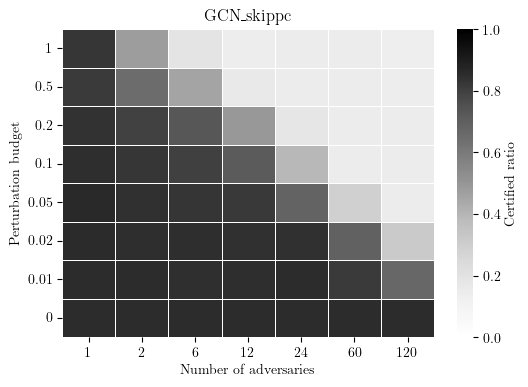

In [ ]:
C = 0.01
experiment_manager.plot_nadv_delta_heatmap(K, ["GCN_skippc"], C, 
                              attack_nodes, n_adv_l, delta_l[::-1],
                              width=1, ratio=1.5, cbar_normalized=True)